# Cleaning web-scraped data

**Priority**
- Clean up reviews
- Convert SalePrice to floats
- Bin SalePrice for our target variable
- Prepare for modeling

**Secondary**
- Clean the rest of data
- Turn Mieage into floats
- Split mpg to city and highway

In [1]:
# imports
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random
import numpy as np
from tqdm.notebook import tqdm
import re
import math

In [2]:
df = pd.read_csv('../data/carinfoV2.csv')

In [3]:
df = df.drop(columns='Unnamed: 0')

**Data is dirty, time to clean**

In [4]:
df

,Model,Reviews,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice
0,['2020 Toyota RAV4 LE'],['Virtually nothing has gone wrong with my 202...,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.","$29,000"
1,[],[],Front-wheel Drive,Electric,Electric,1-Speed Automatic,Electric,"62,439 mi.","$18,989"
2,['2016 Volkswagen e-Golf SE'],"[""Stranded today. Could not get to work. Somet...",Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.","$55,975"
3,['2020 Lincoln Aviator Reserve RWD'],"['Excellent road car, quiet, stable, comfortab...",Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.","$38,900"
4,['2021 Toyota Tacoma TRD Off Road'],"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.","$22,125"
...,...,...,...,...,...,...,...,...,...
9217,['2022 BMW X5 xDrive40i'],['Only had the X5 for 4 weeks now but so far i...,Four-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"78,378 mi.","$25,500"
9218,['2019 Toyota Tacoma TRD Off Road'],['When I bought my 2020 Tacoma V6 (3.5L) 4x4 i...,All-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"30,909 mi.","$35,590"
9219,['2015 INFINITI QX80 Base'],['Everything is great except the rear view cam...,Front-wheel Drive,23–30,Gasoline,6-SPEED A/T,4 Cylinder Engine,"30,186 mi.","$24,000"
9220,['2020 Toyota Tundra SR5'],['I have owned smaller SUV\'s and Trucks for o...,Four-wheel Drive,15–21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,"22,309 mi.","$71,077"


## Removing rows with empty values

**looking through each column and getting rid of blanks**
- manually looking up value counts and checking which character represents a 'blank'

In [5]:
test = df[df['Model'] != '[]']

In [6]:
test2 = test[test['Reviews'] != '[]']

In [7]:
test3 = test2[test2['DriveTrain'] != ' – ']

In [8]:
test4 = test3[test3['MPG'] != ' – ']

In [9]:
test5 = test4[test4['FuelType'] != '– ']

In [10]:
test6 = test5[test5['Transmission'] != '–']

In [11]:
test7 = test6[test6['Engine'] != '–']

**Re-naming**

In [12]:
data = test7

In [13]:
data  = data.reset_index(drop=True)

In [14]:
data.head()

,Model,Reviews,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice
0,['2020 Toyota RAV4 LE'],['Virtually nothing has gone wrong with my 202...,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.","$29,000"
1,['2016 Volkswagen e-Golf SE'],"[""Stranded today. Could not get to work. Somet...",Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.","$55,975"
2,['2020 Lincoln Aviator Reserve RWD'],"['Excellent road car, quiet, stable, comfortab...",Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.","$38,900"
3,['2021 Toyota Tacoma TRD Off Road'],"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.","$22,125"
4,['2020 Nissan Altima 2.5 S'],['I’ve own a 2020 Altima (under 30k miles) for...,Front-wheel Drive,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"41,614 mi.","$23,946"
...,...,...,...,...,...,...,...,...,...
8476,['2022 BMW X5 xDrive40i'],['Only had the X5 for 4 weeks now but so far i...,Four-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"78,378 mi.","$25,500"
8477,['2019 Toyota Tacoma TRD Off Road'],['When I bought my 2020 Tacoma V6 (3.5L) 4x4 i...,All-wheel Drive,18–25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,"30,909 mi.","$35,590"
8478,['2015 INFINITI QX80 Base'],['Everything is great except the rear view cam...,Front-wheel Drive,23–30,Gasoline,6-SPEED A/T,4 Cylinder Engine,"30,186 mi.","$24,000"
8479,['2020 Toyota Tundra SR5'],['I have owned smaller SUV\'s and Trucks for o...,Four-wheel Drive,15–21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,"22,309 mi.","$71,077"


**Only ~1899 unique reviews, okay for this project**
- Would like to grab more unique reviews in the future

## Converting numeric data into floats

**Converting from string to float**
- getting numbers
- turning number string to float

In [15]:
data['SalePrice'] = data['SalePrice'].str.translate({ord(i): None for i in '$,'})

In [16]:
data = data.loc[data['SalePrice'] != 'Not Priced']

In [17]:
data['SalePrice'] = data['SalePrice'].astype(float)

<ipython-input-17-50854e4490e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SalePrice'] = data['SalePrice'].astype(float)


**Checking if changes were applied correctly**

In [18]:
data.head()

,Model,Reviews,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice
0,['2020 Toyota RAV4 LE'],['Virtually nothing has gone wrong with my 202...,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.",29000.0
1,['2016 Volkswagen e-Golf SE'],"[""Stranded today. Could not get to work. Somet...",Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.",55975.0
2,['2020 Lincoln Aviator Reserve RWD'],"['Excellent road car, quiet, stable, comfortab...",Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.",38900.0
3,['2021 Toyota Tacoma TRD Off Road'],"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.",22125.0
4,['2020 Nissan Altima 2.5 S'],['I’ve own a 2020 Altima (under 30k miles) for...,Front-wheel Drive,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"41,614 mi.",23946.0


## Creating a target column by binning sale prices

**Binning SalePrice for target variable**
- Seems to have good distribubtion of prices
- Use qcut to bin, use as starting point

In [19]:
data['SalePrice'].describe()

count      8475.000000
mean      38280.058997
std       22057.867345
min        2500.000000
25%       25376.500000
50%       34598.000000
75%       44988.000000
max      435500.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

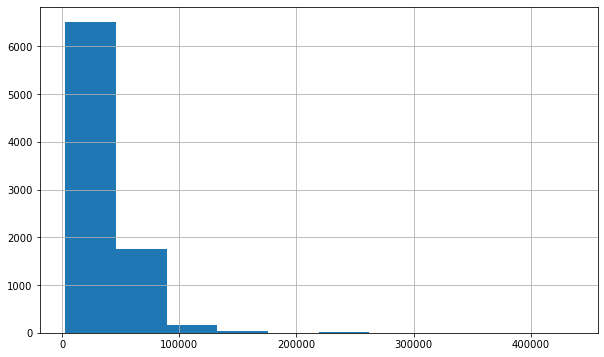

In [20]:
data['SalePrice'].hist(figsize=(10,6))

In [21]:
pd.qcut(data['SalePrice'], q=5).unique()

[(23952.2, 30855.8], (47902.6, 435500.0], (38590.0, 47902.6], (2499.999, 23952.2], (30855.8, 38590.0]]
Categories (5, interval[float64]): [(2499.999, 23952.2] < (23952.2, 30855.8] < (30855.8, 38590.0] < (38590.0, 47902.6] < (47902.6, 435500.0]]

**Outliers seem to have little effect on binning**

In [22]:
pd.qcut(data.loc[data['SalePrice'] <= 150000]['SalePrice'], q=5).unique()

[(23910.0, 30731.6], (47625.2, 149999.0], (38500.0, 47625.2], (2499.999, 23910.0], (30731.6, 38500.0]]
Categories (5, interval[float64]): [(2499.999, 23910.0] < (23910.0, 30731.6] < (30731.6, 38500.0] < (38500.0, 47625.2] < (47625.2, 149999.0]]

**Came back and used 3 bins instead of 5**
- Models preformed better with 3 bins
- For my business understanding it is okay
- Consumer would use as a starting point

In [23]:
pd.qcut(data['SalePrice'], q=3).unique()

[(28285.667, 40995.0], (40995.0, 435500.0], (2499.999, 28285.667]]
Categories (3, interval[float64]): [(2499.999, 28285.667] < (28285.667, 40995.0] < (40995.0, 435500.0]]

**Bins to be used**
- Cheap 0-28k
- Average 28k-45k
- Expensive 45k+


This is for the cars in this dataset, Google says average price in AL is 33k. Binning is okay for general idea.

In [24]:
bins = [
    (data['SalePrice'] <= 28000),
    (data['SalePrice'] > 28000) & (data['SalePrice'] <= 45000),
    (data['SalePrice'] > 45000)
    ]

# create a list of the values we want to assign for each condition
price_cat = ['Cheap', 'Average', 'Expensive']

# create a new column and use np.select to assign values to it using our lists as arguments
data['PriceCategory'] = np.select(bins, price_cat)

<ipython-input-24-746454a585dc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceCategory'] = np.select(bins, price_cat)


In [25]:
data.head()

,Model,Reviews,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice,PriceCategory
0,['2020 Toyota RAV4 LE'],['Virtually nothing has gone wrong with my 202...,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.",29000.0,Average
1,['2016 Volkswagen e-Golf SE'],"[""Stranded today. Could not get to work. Somet...",Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.",55975.0,Expensive
2,['2020 Lincoln Aviator Reserve RWD'],"['Excellent road car, quiet, stable, comfortab...",Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.",38900.0,Average
3,['2021 Toyota Tacoma TRD Off Road'],"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.",22125.0,Cheap
4,['2020 Nissan Altima 2.5 S'],['I’ve own a 2020 Altima (under 30k miles) for...,Front-wheel Drive,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"41,614 mi.",23946.0,Cheap


**Bins seem evenly distributed**
- makes sense there are more average cars and less expensive cars 

In [26]:
data['PriceCategory'].value_counts()

Average      3625
Cheap        2809
Expensive    2041
Name: PriceCategory, dtype: int64

## Cleaning the reviews

**Grabbing a review**
- attempt to clean it
- create new column with clean reviews

In [27]:
def review_cleaner(rev):
    '''
    Takes in a string and removes special characters.
    Returns the string with no special characters.
    '''
    clean = re.sub(r'\\n', '', rev)
    clean = re.sub(r'\\r', '', clean)
    clean = clean.replace('[', '')
    clean = clean.replace(']', '')
    clean = clean.replace('"', '')
    clean = clean.replace("'", "")
    return clean

In [28]:
data['Reviews'][45]

"['it was nice joyable but 2008 is better and it has a spear tire and was very nice i rate it 8/10 that better then nothing.', '2008 model was much better than 2013 and what idiot eng placed a spare tire in the floor?\\nWhen you have big family you need space for storage on the long trips.\\nSo Ac issues, sliding door issues, EGR issues VSC issues', 'Amazing van.  Love it, love it, love it.  Reliable Honda Odyssey.  Great for family vacations.  The kids, dogs, family, and friends enjoy riding in the van.']"

In [29]:
review_cleaner(data['Reviews'][45])

'it was nice joyable but 2008 is better and it has a spear tire and was very nice i rate it 8/10 that better then nothing., 2008 model was much better than 2013 and what idiot eng placed a spare tire in the floor?When you have big family you need space for storage on the long trips.So Ac issues, sliding door issues, EGR issues VSC issues, Amazing van.  Love it, love it, love it.  Reliable Honda Odyssey.  Great for family vacations.  The kids, dogs, family, and friends enjoy riding in the van.'

In [30]:
data['CleanReviews'] = data['Reviews'].apply(lambda x: review_cleaner(x))

<ipython-input-30-cfc12aaf38a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CleanReviews'] = data['Reviews'].apply(lambda x: review_cleaner(x))


In [31]:
data['CleanReviews'][8]

'I’ve wanted a duramax for a long time but finding the right one wasn’t easy! I am in LOVE with my new purchase. Can’t wait to hook my horse trailer to it!, This truck has everything...... Its by far the nicest pickup I have ever driven and owned !!!!! I would recommend this to all my friends !, After haven driving several new heavy duty diesel pickups I decided to go with the Chevrolet. The L5P engine is powerful, and Of course they’re all powerful these days. But this truck is fast, faster than my most of my friends trucks that have aftermarket tunes. Faster than my neighbors tuned 6.7 ford. 2019 was the last year of the real Allison transmission 6 speed so that’s a plus also. The new trucks have a GM 10 speed. The truck seems to be rock solid so far. No real issues yet. Hauled number ours heavy trailers and haven’t had an issue. Truck is my daily driver and rides great. It rides just like a half ton.'

**It works :)**

In [32]:
data.head()

,Model,Reviews,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice,PriceCategory,CleanReviews
0,['2020 Toyota RAV4 LE'],['Virtually nothing has gone wrong with my 202...,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.",29000.0,Average,Virtually nothing has gone wrong with my 2020 ...
1,['2016 Volkswagen e-Golf SE'],"[""Stranded today. Could not get to work. Somet...",Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.",55975.0,Expensive,Stranded today. Could not get to work. Somethi...
2,['2020 Lincoln Aviator Reserve RWD'],"['Excellent road car, quiet, stable, comfortab...",Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.",38900.0,Average,"Excellent road car, quiet, stable, comfortable..."
3,['2021 Toyota Tacoma TRD Off Road'],"['PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. ...",Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.",22125.0,Cheap,"PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. LO..."
4,['2020 Nissan Altima 2.5 S'],['I’ve own a 2020 Altima (under 30k miles) for...,Front-wheel Drive,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"41,614 mi.",23946.0,Cheap,I’ve own a 2020 Altima (under 30k miles) for a...


## Focus on secondary list

**Secondary**
- clean the rest of the data

In [33]:
data = data.drop(columns='Reviews')

In [34]:
data.head()

,Model,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice,PriceCategory,CleanReviews
0,['2020 Toyota RAV4 LE'],Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.",29000.0,Average,Virtually nothing has gone wrong with my 2020 ...
1,['2016 Volkswagen e-Golf SE'],Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.",55975.0,Expensive,Stranded today. Could not get to work. Somethi...
2,['2020 Lincoln Aviator Reserve RWD'],Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.",38900.0,Average,"Excellent road car, quiet, stable, comfortable..."
3,['2021 Toyota Tacoma TRD Off Road'],Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.",22125.0,Cheap,"PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. LO..."
4,['2020 Nissan Altima 2.5 S'],Front-wheel Drive,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"41,614 mi.",23946.0,Cheap,I’ve own a 2020 Altima (under 30k miles) for a...


**Apply cleaner function to Model**

In [35]:
data['Model'] = data['Model'].apply(lambda x: review_cleaner(x))

In [36]:
data['Model'][0].split()[2]

'RAV4'

**Get year model and make in seperate cols**

In [37]:
data['Year'] = data['Model'].apply(lambda x: x.split()[0])

In [38]:
data['Make'] = data['Model'].apply(lambda x: x.split()[1])

In [39]:
data['Car_Model'] = data['Model'].apply(lambda x: x.split()[2])

In [40]:
data.head()

,Model,DriveTrain,MPG,FuelType,Transmission,Engine,Mileage,SalePrice,PriceCategory,CleanReviews,Year,Make,Car_Model
0,2020 Toyota RAV4 LE,Front-wheel Drive,27–35,Gasoline,8-Speed Automatic,2.5L I4 16V PDI DOHC,"53,200 mi.",29000.0,Average,Virtually nothing has gone wrong with my 2020 ...,2020,Toyota,RAV4
1,2016 Volkswagen e-Golf SE,Rear-wheel Drive,18–26,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,"22,690 mi.",55975.0,Expensive,Stranded today. Could not get to work. Somethi...,2016,Volkswagen,e-Golf
2,2020 Lincoln Aviator Reserve RWD,Four-wheel Drive,18–22,Gasoline,6-Speed Automatic,3.5L V6 24V PDI DOHC,"17,854 mi.",38900.0,Average,"Excellent road car, quiet, stable, comfortable...",2020,Lincoln,Aviator
3,2021 Toyota Tacoma TRD Off Road,Front-wheel Drive,28–39,Gasoline,Automatic CVT,2.5L I4 16V GDI DOHC,"60,907 mi.",22125.0,Cheap,"PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. LO...",2021,Toyota,Tacoma
4,2020 Nissan Altima 2.5 S,Front-wheel Drive,24–32,Gasoline,6-Speed Automatic,2.4L I4 16V GDI DOHC,"41,614 mi.",23946.0,Cheap,I’ve own a 2020 Altima (under 30k miles) for a...,2020,Nissan,Altima


**Turn mileage and year into floats**

In [41]:
data['Mileage'] = data['Mileage'].str.translate({ord(i): None for i in ',mi. '})

In [42]:
data = data[data['Mileage'] != '–']

In [43]:
data = data.reset_index(drop=True)

In [44]:
data['Mileage'] = data['Mileage'].astype(float)

In [45]:
data['Year'] = data['Year'].astype(float)

**Simpify columns**
- DriveTrain - AWD, FWD, RWD
- FuelType - GAS, DIS, ELE
- Engine - size and cylinders
- Transmission - AUTO, MANUEL, ELE
- MPG - City, Highway

**Fixing DriveTrain**

In [46]:
driveT = {' Front-wheel Drive ' : 'FWD',
         ' All-wheel Drive ' : 'AWD',
         ' Four-wheel Drive ' : 'FWD',
         ' Rear-wheel Drive ' : 'RWD',
         ' 4WD ' : 'FWD',
         ' FWD ' : 'FWD',
         ' AWD ' : 'AWD',
         ' RWD ' : 'RWD'}

In [47]:
data.replace({"DriveTrain": driveT})['DriveTrain'].value_counts()

FWD    5281
AWD    1801
RWD    1392
Name: DriveTrain, dtype: int64

In [48]:
data.replace({'DriveTrain': driveT},inplace=True)

**Using a type of number indicator to be able to find and then change to an average when mpg is a float**
- some details of the car were saved to the wrong column
- to fix this we can get the average mpg for a gas car, diesel car, etc. and fill in with correct values

In [50]:
gasDict = {'Diesel ' : '456–654',
          'Gasoline ' : '789–987',
          'E85 Flex Fuel ' : '789–987',
          'Hybrid ' : '789–987',
          'Electric ' : '1234–4321'}

In [51]:
data.replace({"MPG": gasDict}, inplace=True)

In [53]:
data['MPG']  = data['MPG'].apply(lambda x: float(x.split('–')[0]))

In [54]:
data = data.drop(columns=['Model'])

**Reducing the fuel type values to 4 values**

In [55]:
data['FuelType'].value_counts().index

Index(['Gasoline ', 'Diesel ', 'E85 Flex Fuel ', 'Hybrid ', 'Electric ',
       'Gasoline Fuel ', 'Gasoline/Mild Electric Hybrid '],
      dtype='object')

In [56]:
fueldict = {'Gasoline ' : 'Gasoline',
           'Diesel ' : 'Diesel',
           'E85 Flex Fuel ': 'Gasoline',
           'Hybrid ' : 'Hybird',
           'Electric ' : 'Electric',
           'Gasoline Fuel ' : 'Gasoline',
           'Gasoline/Mild Electric Hybrid ' : 'Hybird'}

In [57]:
data.replace({"FuelType": fueldict}, inplace=True)

In [58]:
data['FuelType'].value_counts()

Gasoline    8079
Diesel       170
Hybird       143
Electric      82
Name: FuelType, dtype: int64

In [60]:
data['isAuto'] = data['Transmission'].str.lower().str.contains("auto")

**Dropping transmission and fueltype columns**
- each column is dominated by a single value, ~95%
- model won't learn much from it
- sklearn.feature_selection.VarianceThreshold
     - sklearn has the same idea with the threshold being 90-95% to drop a column

In [61]:
data['isAuto'].value_counts(normalize=True)

True     0.941822
False    0.058178
Name: isAuto, dtype: float64

In [62]:
data['FuelType'].value_counts(normalize=True)

Gasoline    0.953387
Diesel      0.020061
Hybird      0.016875
Electric    0.009677
Name: FuelType, dtype: float64

In [63]:
data = data.drop(columns=['FuelType', 'Transmission', 'isAuto'])

**Fix EngineSize and Cylinders**

In [64]:
data['EngineSize'] = data['Engine'].apply(lambda x: x.split()[0]) #getting the engine size in liters

In [65]:
cyl = []

In [66]:
for x in data['Engine']: #if it has a value get it, if not fill with 'none'
    try:
        cyl.append(x.split()[1])
    except:
        cyl.append('none')

In [67]:
data['Cylinders'] = cyl

In [68]:
data = data.replace({'Cylinders':{'I4':4, #look at the new Cylinder columns
                       'V6':6,            #there is some incorrect data
                       'V8':8,            #depending on the incorrect data(size of engine in liters) replace
                      'I6':6,             #with the common cylnder size
                      'H4':4,
                      'I3': 3,
                       'H6': 6,
                      '6': 6,
                      '3.0L': 6,
                      'V12':12,
                      '3.7L': 6,
                      'I5': 5}})

**Create an indicator column to be able to cross-reference later**

In [69]:
data['hasCyl'] = data['Cylinders'].str.isdigit() #if it has some sort of integer then it is true
                                                  #it does have a correct cylinder number, else its false

In [70]:
data['hasSize'] = data['EngineSize'].str.contains('L') #if the string contains 'L' then it has the correct value (3.5L)
                                                       # if it doesn't it is false

In [71]:
data = data.drop(columns='Engine')

In [72]:
data['EngineSize'].value_counts().index

Index(['2.0L', '3.5L', '2.5L', '3.6L', '3.0L', '2.4L', '1.5L', '5.3L', '5.7L',
       '4', '4.0L', 'V6', '1.8L', '6.2L', '1.6L', '2.7L', '5.0L', '3.8L', '8',
       'Electric', '2.3L', '1.4L', '4.4L', '3.3L', '5.6L', 'I4', '6.7L',
       'Regular', '4.6L', '6.6L', 'Intercooled', '6.4L', '3.7L', 'Gas', '6.0L',
       'V8', '4.7L', '3.2L', '2.9L', 'Engine:', 'Straight', 'Turbocharged',
       '1.3L', '5.5L', '1.0L', '4.3L', 'Twin', '6', 'Premium', '1.2L', '3.4L',
       '4.8L', '5.4L', '395.0HP', '335.0HP', '5', 'Gas/Ethanol', '275.0HP',
       '290.0HP', '400.0HP', '4.2L', '403.0HP', '280.0HP', '445.0HP',
       '345.0HP', '3', '2.2L', '175.0HP', '5.2L', '3.9L', '180.0HP', '190.0HP',
       '333.0HP', '12', 'VORTEC', 'Ecoboost', '380.0HP', '210.0HP', '250.0HP',
       '185.0HP', '235.0HP', 'Engine:1.8L', '248.0HP', '170.0HP', '181.0HP',
       '7.4L', '2.1L', '640.0HP', '7.0L', '503.0HP', '6.8L', '10', '178.0HP'],
      dtype='object')

In [73]:
data[(data['hasCyl'].isna() == False) & (data['hasSize'] == False)].head()

,DriveTrain,MPG,Mileage,SalePrice,PriceCategory,CleanReviews,Year,Make,Car_Model,EngineSize,Cylinders,hasCyl,hasSize
15,FWD,29.0,105026.0,14433.0,Cheap,"Beautiful, comfortable, responsive... my only ...",2020.0,Lexus,ES,Regular,Unleaded,False,False
21,FWD,20.0,28716.0,47590.0,Expensive,The X3 m40i is the best family vehicle. Got a ...,2019.0,BMW,X3,V6,Cylinder,False,False
36,RWD,25.0,98467.0,24786.0,Cheap,I got my crew cab 2019 F250 XLT with the 6.2L ...,2019.0,Ford,F-250,Intercooled,Turbo,False,False
46,AWD,27.0,32708.0,31998.0,Average,"61000 miles 2016 Sierra 1500. 2,800 repair for...",2021.0,GMC,Sierra,4,Cylinder,False,False
58,FWD,18.0,19855.0,104995.0,Expensive,No surprise .... good performance. It is a M...,2014.0,Mercedes-Benz,CLA-Class,V6,none,False,False


**Creating a newSize column**

In [74]:
newSize = []

In [75]:
for i in range(0,len(data)): #looping through the index
    
    if data['hasCyl'][i] == False and data['hasSize'][i]==False: #check when indicator cols are false
        if 'L' in data['Cylinders'][i]: #if it has L use it, correct value
            newSize.append(data['Cylinders'][i])
        elif '6' in data['EngineSize'][i]: #if it has 6 use 3.5L, most common for 6 cylinders
            newSize.append('3.5L')
        elif '4' in data['EngineSize'][i]: #if it has 4 use 2.5L, most common for 4 cylinders
            newSize.append('2.5L')
        else:
            newSize.append('unknown') #we just don't know

    elif data['hasSize'][i] == True or math.isnan(data['hasCyl'][i]) == True:
        newSize.append(data['EngineSize'][i]) #if it already has a valid value, use it
    else:
        newSize.append(data['EngineSize'][i]) #if it already has a valid value, use it
    

In [76]:
lst = []
for x in newSize:
    if 'L' not in x or 'Engine' in x: # if it doesnt have L or has Engine, we dont know
        x = 'unknown'
        lst.append(x)
    else: #it does have an L so we use it
        x = x
        lst.append(x)

In [77]:
data['newSize'] = lst

**Creating a newCyl coloumn**

In [79]:
newCyl = []

In [80]:
data[data['hasCyl'].isna() == False].head()

,DriveTrain,MPG,Mileage,SalePrice,PriceCategory,CleanReviews,Year,Make,Car_Model,EngineSize,Cylinders,hasCyl,hasSize,newSize
15,FWD,29.0,105026.0,14433.0,Cheap,"Beautiful, comfortable, responsive... my only ...",2020.0,Lexus,ES,Regular,Unleaded,False,False,unknown
21,FWD,20.0,28716.0,47590.0,Expensive,The X3 m40i is the best family vehicle. Got a ...,2019.0,BMW,X3,V6,Cylinder,False,False,3.5L
36,RWD,25.0,98467.0,24786.0,Cheap,I got my crew cab 2019 F250 XLT with the 6.2L ...,2019.0,Ford,F-250,Intercooled,Turbo,False,False,unknown
46,AWD,27.0,32708.0,31998.0,Average,"61000 miles 2016 Sierra 1500. 2,800 repair for...",2021.0,GMC,Sierra,4,Cylinder,False,False,2.5L
58,FWD,18.0,19855.0,104995.0,Expensive,No surprise .... good performance. It is a M...,2014.0,Mercedes-Benz,CLA-Class,V6,none,False,False,3.5L


In [81]:
for i in range(0,len(data)): #looping through index
    
    if data['hasCyl'][i] == False: #checking our indicator column
        if '2' in data['newSize'][i]: #if it has a 2 (2.5L, 2.8L, etc.) then its most likely a 4 cylinder
            newCyl.append(4)
        elif '3' in data['newSize'][i]: #if it has a 3 then its most likely a 6 cylinder
            newCyl.append(6)
        elif '4' in data['newSize'][i]: #if it has a 4 then its most likely a 8 cylinder
            newCyl.append(8)
        else:
            newCyl.append('unknown') #we just dont know
    else:
        newCyl.append(data['Cylinders'][i]) #has correct value 

In [82]:
len(newCyl) == len(data) #checking if lengths are the same, if they are then we can make a new column

True

In [83]:
data['newCyl'] = newCyl

In [85]:
data = data.drop(columns=['EngineSize', 'Cylinders', 'hasCyl', 'hasSize', 'Car_Model'])

In [86]:
data.head()

,DriveTrain,MPG,Mileage,SalePrice,PriceCategory,CleanReviews,Year,Make,newSize,newCyl
0,FWD,27.0,53200.0,29000.0,Average,Virtually nothing has gone wrong with my 2020 ...,2020.0,Toyota,2.5L,4
1,RWD,18.0,22690.0,55975.0,Expensive,Stranded today. Could not get to work. Somethi...,2016.0,Volkswagen,3.0L,6
2,FWD,18.0,17854.0,38900.0,Average,"Excellent road car, quiet, stable, comfortable...",2020.0,Lincoln,3.5L,6
3,FWD,28.0,60907.0,22125.0,Cheap,"PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. LO...",2021.0,Toyota,2.5L,4
4,FWD,24.0,41614.0,23946.0,Cheap,I’ve own a 2020 Altima (under 30k miles) for a...,2020.0,Nissan,2.4L,4


**Getting only the top25 makes, the rest will the 'Other'**

In [87]:
top25 = data['Make'].value_counts()[:25].index

In [88]:
len(data['Make'].value_counts()[25:])

21

In [89]:
makes = []
for make in data['Make']: #if car does not have the top25 make fill with 'other'
    if make not in top25:
        make = 'Other'
        makes.append(make)
    else:                   #else use the make
        makes.append(make)
        

In [90]:
data['newMake'] = makes

In [91]:
data.head(3)

,DriveTrain,MPG,Mileage,SalePrice,PriceCategory,CleanReviews,Year,Make,newSize,newCyl,newMake
0,FWD,27.0,53200.0,29000.0,Average,Virtually nothing has gone wrong with my 2020 ...,2020.0,Toyota,2.5L,4,Toyota
1,RWD,18.0,22690.0,55975.0,Expensive,Stranded today. Could not get to work. Somethi...,2016.0,Volkswagen,3.0L,6,Volkswagen
2,FWD,18.0,17854.0,38900.0,Average,"Excellent road car, quiet, stable, comfortable...",2020.0,Lincoln,3.5L,6,Other


In [92]:
data['newMake'].value_counts()

Toyota           976
Ford             843
Chevrolet        686
Honda            615
Nissan           526
BMW              502
Mercedes-Benz    405
Kia              363
Other            360
Jeep             352
Hyundai          308
Lexus            297
GMC              253
Dodge            234
Audi             219
RAM              202
Volkswagen       195
INFINITI         175
Acura            158
Land             153
Volvo            138
Cadillac         113
Mazda            112
Subaru           107
Porsche          104
Tesla             78
Name: newMake, dtype: int64

**Mode value for engine size**

In [93]:
modeSize = '2.0L'

In [94]:
data['newSize'].value_counts()

2.0L       1596
3.5L       1297
2.5L       1105
3.6L        605
3.0L        466
unknown     382
2.4L        375
1.5L        368
5.3L        264
5.7L        248
4.0L        193
1.8L        173
6.2L        171
1.6L        139
5.0L        126
2.7L        126
3.8L        111
2.3L         81
1.4L         76
4.4L         71
5.6L         69
3.3L         68
6.7L         65
4.6L         53
6.6L         48
6.4L         35
3.7L         31
6.0L         21
4.7L         18
3.2L         15
2.9L         13
5.5L         12
1.3L         11
1.0L         10
4.3L          8
1.2L          5
3.4L          4
4.8L          3
5.4L          3
4.2L          2
2.2L          1
6.8L          1
3.9L          1
5.2L          1
7.0L          1
7.4L          1
2.1L          1
Name: newSize, dtype: int64

**Mode for most common cylinder**

In [95]:
modeCyl = 4

In [96]:
data['newCyl'].value_counts()

4          3908
6          2910
8          1255
unknown     336
3            54
12            7
5             4
Name: newCyl, dtype: int64

**These are the dummy mpg values used to fill in with correct mpg (the mode mpg)**


{'Diesel ' : '456–654',
          'Gasoline ' : '789–987',
          'E85 Flex Fuel ' : '789–987',
          'Hybrid ' : '789–987',
          'Electric ' : '1234–4321'}

- 1234 - 23 mpg looking at reviews seem like avg cars so avg mpg
- 456 - 18 mpg most are 6 or 9 cylinders
- 789 - 23 mpg mix so avg mpg

In [97]:
data['MPG'].value_counts(normalize=True).index

Float64Index([  19.0,   20.0,   18.0,   22.0,   21.0,   17.0,   16.0,   23.0,
               789.0,   26.0,   24.0,   28.0,   25.0,   15.0,   27.0,   29.0,
                30.0,   14.0,   13.0,  456.0,   31.0,    0.0,   32.0,   12.0,
              1234.0,   51.0,   33.0,   58.0,   57.0,   55.0,  131.0,  120.0,
                41.0,   36.0,   10.0,  136.0,  128.0,   79.0,   43.0,   40.0,
               140.0,   11.0,   68.0,  115.0,  104.0,   53.0,  127.0,   91.0,
                48.0,   54.0,   99.0,   44.0,   37.0,  103.0,   39.0,  137.0,
               138.0,  116.0,   42.0,   76.0,   35.0,   78.0,   90.0,  113.0,
               124.0,  109.0,  100.0,   38.0,   34.0,   92.0,  102.0,   47.0],
             dtype='float64')

In [98]:
data = data.replace({'MPG':{1234 : 23,
                          456: 18,
                          789: 23}})

**Correcting uncommon high mpgs with a the mode mpg**

In [99]:
mpg = []
for miles in data['MPG']:
    if miles >= 60:
        miles = 23
        mpg.append(miles)
    else:
        miles = miles
        mpg.append(miles)

In [100]:
data['mpg'] = mpg

In [101]:
data.head()

,DriveTrain,MPG,Mileage,SalePrice,PriceCategory,CleanReviews,Year,Make,newSize,newCyl,newMake,mpg
0,FWD,27.0,53200.0,29000.0,Average,Virtually nothing has gone wrong with my 2020 ...,2020.0,Toyota,2.5L,4,Toyota,27.0
1,RWD,18.0,22690.0,55975.0,Expensive,Stranded today. Could not get to work. Somethi...,2016.0,Volkswagen,3.0L,6,Volkswagen,18.0
2,FWD,18.0,17854.0,38900.0,Average,"Excellent road car, quiet, stable, comfortable...",2020.0,Lincoln,3.5L,6,Other,18.0
3,FWD,28.0,60907.0,22125.0,Cheap,"PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. LO...",2021.0,Toyota,2.5L,4,Toyota,28.0
4,FWD,24.0,41614.0,23946.0,Cheap,I’ve own a 2020 Altima (under 30k miles) for a...,2020.0,Nissan,2.4L,4,Nissan,24.0


**Applying changes with mode**

In [102]:
data = data.replace({'newSize':{'unknown': modeSize}})

In [103]:
data = data.replace({'newCyl':{'unknown': modeCyl}})

In [104]:
data['newSize'] = data['newSize'].str.replace('L', '').astype(float)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8474 entries, 0 to 8473
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DriveTrain     8474 non-null   object 
 1   MPG            8474 non-null   float64
 2   Mileage        8474 non-null   float64
 3   SalePrice      8474 non-null   float64
 4   PriceCategory  8474 non-null   object 
 5   CleanReviews   8474 non-null   object 
 6   Year           8474 non-null   float64
 7   Make           8474 non-null   object 
 8   newSize        8474 non-null   float64
 9   newCyl         8474 non-null   int64  
 10  newMake        8474 non-null   object 
 11  mpg            8474 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 794.6+ KB


## Creating final dataframe

In [106]:
final_data = data.drop(columns=['MPG', 'Make'])

**Checking all the final data is in the correct format**

In [107]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8474 entries, 0 to 8473
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DriveTrain     8474 non-null   object 
 1   Mileage        8474 non-null   float64
 2   SalePrice      8474 non-null   float64
 3   PriceCategory  8474 non-null   object 
 4   CleanReviews   8474 non-null   object 
 5   Year           8474 non-null   float64
 6   newSize        8474 non-null   float64
 7   newCyl         8474 non-null   int64  
 8   newMake        8474 non-null   object 
 9   mpg            8474 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 662.2+ KB


In [108]:
final_data

,DriveTrain,Mileage,SalePrice,PriceCategory,CleanReviews,Year,newSize,newCyl,newMake,mpg
0,FWD,53200.0,29000.0,Average,Virtually nothing has gone wrong with my 2020 ...,2020.0,2.5,4,Toyota,27.0
1,RWD,22690.0,55975.0,Expensive,Stranded today. Could not get to work. Somethi...,2016.0,3.0,6,Volkswagen,18.0
2,FWD,17854.0,38900.0,Average,"Excellent road car, quiet, stable, comfortable...",2020.0,3.5,6,Other,18.0
3,FWD,60907.0,22125.0,Cheap,"PURCHASED FROM NYE TOYOTA, MY FIRST TACOMA. LO...",2021.0,2.5,4,Toyota,28.0
4,FWD,41614.0,23946.0,Cheap,I’ve own a 2020 Altima (under 30k miles) for a...,2020.0,2.4,4,Nissan,24.0
...,...,...,...,...,...,...,...,...,...,...
8469,FWD,78378.0,25500.0,Cheap,Only had the X5 for 4 weeks now but so far it ...,2022.0,3.6,6,BMW,18.0
8470,AWD,30909.0,35590.0,Average,When I bought my 2020 Tacoma V6 (3.5L) 4x4 in ...,2019.0,3.6,6,Toyota,18.0
8471,FWD,30186.0,24000.0,Cheap,Everything is great except the rear view camer...,2015.0,2.5,4,INFINITI,23.0
8472,FWD,22309.0,71077.0,Expensive,I have owned smaller SUV\s and Trucks for over...,2020.0,5.7,8,Toyota,15.0


In [109]:
final_data['PriceCategory'].value_counts(normalize=True)

Average      0.427661
Cheap        0.331485
Expensive    0.240854
Name: PriceCategory, dtype: float64